<a href="https://colab.research.google.com/github/crislmfroes/tensorflow-colab/blob/master/classificador_de_review.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

In [2]:
imdb = keras.datasets.imdb
(dados_treinamento, categorias_treinamento), (dados_teste, categorias_teste) = imdb.load_data()

17465344/17464789 [==============================] - 0s 0us/step


In [3]:
print(dados_treinamento.shape)

(25000,)


In [4]:
print(dados_treinamento[0])

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 22665, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 21631, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 19193, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 10311, 8, 4, 107, 117, 5952, 15, 256, 4, 31050, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 12118, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]


In [5]:
print(len(categorias_treinamento))

25000


In [0]:
indice_palavras = imdb.get_word_index()
indice_palavras = {k: (v+3) for k, v in indice_palavras.items()}
indice_palavras['<PAD>'] = 0
indice_palavras['<START>'] = 1
indice_palavras['<UNK>'] = 2
indice_palavras['<UNUSED>'] = 3

indice_palavras_reverso = dict([(valor, chave) for chave, valor in indice_palavras.items()])

def decodifica_review(texto):
  return ' '.join([indice_palavras_reverso.get(i, '?') for i in texto])

In [14]:
decodifica_review(dados_treinamento[100])

"<START> i am a great fan of david lynch and have everything that he's made on dvd except for hotel room the 2 hour twin peaks movie so when i found out about this i immediately grabbed it and and what is this it's a bunch of crudely drawn black and white cartoons that are loud and foul mouthed and unfunny maybe i don't know what's good but maybe this is just a bunch of crap that was foisted on the public under the name of david lynch to make a few bucks too let me make it clear that i didn't care about the foul language part but had to keep adjusting the sound because my neighbors might have all in all this is a highly disappointing release and may well have just been left in the deluxe box set as a curiosity i highly recommend you don't spend your money on this 2 out of 10"

In [0]:
dados_teste = keras.preprocessing.sequence.pad_sequences(dados_teste, value=indice_palavras['<PAD>'], padding='post', maxlen=256)
dados_treinamento = keras.preprocessing.sequence.pad_sequences(dados_treinamento, value=indice_palavras['<PAD>'], padding='post', maxlen=256)

In [16]:
len(dados_treinamento[0]), len(dados_treinamento[1])

(256, 256)

In [17]:
dados_treinamento.shape, dados_teste.shape

((25000, 256), (25000, 256))

In [18]:
tamanho_vocab = 10000
modelo = keras.Sequential([
    keras.layers.Embedding(tamanho_vocab, 16),
    keras.layers.GlobalAveragePooling1D(),
    keras.layers.Dense(16, activation=tf.nn.relu),
    keras.layers.Dense(1, activation=tf.nn.sigmoid)
])

modelo.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 16)          160000    
_________________________________________________________________
global_average_pooling1d (Gl (None, 16)                0         
_________________________________________________________________
dense (Dense)                (None, 16)                272       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 17        
Total params: 160,289
Trainable params: 160,289
Non-trainable params: 0
_________________________________________________________________


In [0]:
modelo.compile(optimizer=tf.train.AdamOptimizer(), loss='binary_crossentropy', metrics=['accuracy'])

In [0]:
dados_validacao = dados_treinamento[:10000]
dados_treinamento_parcial = dados_treinamento[10000:]

categorias_validacao = categorias_treinamento[:10000]
categorias_treinamento_parcial = categorias_treinamento[10000:]

In [22]:
historia = modelo.fit(dados_treinamento_parcial, categorias_treinamento_parcial, epochs=40, batch_size=512, validation_data=(dados_validacao, categorias_validacao), verbose=1)

Train on 15000 samples, validate on 10000 samples
Epoch 1/40
15000/15000 [==============================] - 1s 82us/step - loss: 0.6918 - acc: 0.5435 - val_loss: 0.6900 - val_acc: 0.5863
Epoch 2/40
15000/15000 [==============================] - 0s 31us/step - loss: 0.6864 - acc: 0.6878 - val_loss: 0.6826 - val_acc: 0.7527
Epoch 3/40
15000/15000 [==============================] - 0s 32us/step - loss: 0.6750 - acc: 0.7718 - val_loss: 0.6684 - val_acc: 0.7619
Epoch 4/40
15000/15000 [==============================] - 0s 31us/step - loss: 0.6546 - acc: 0.7759 - val_loss: 0.6454 - val_acc: 0.7665
Epoch 5/40
15000/15000 [==============================] - 0s 32us/step - loss: 0.6242 - acc: 0.7992 - val_loss: 0.6127 - val_acc: 0.7886
Epoch 6/40
15000/15000 [==============================] - 0s 31us/step - loss: 0.5853 - acc: 0.8115 - val_loss: 0.5748 - val_acc: 0.8010
Epoch 7/40
15000/15000 [==============================] - 0s 32us/step - loss: 0.5415 - acc: 0.8260 - val_loss: 0.5348 - val_acc

In [23]:
resultados = modelo.evaluate(dados_teste, categorias_teste)

25000/25000 [==============================] - 2s 64us/step


In [24]:
print(resultados)

[0.32371595070838927, 0.87328]


In [26]:
historia_dict = historia.history
historia_dict.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

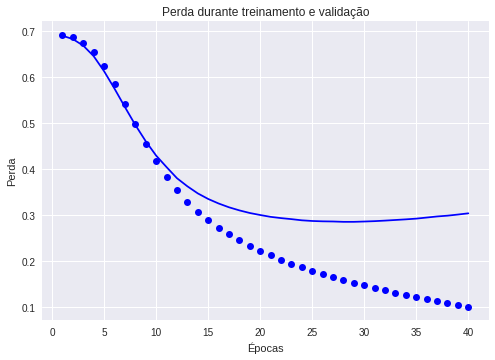

In [28]:
precisao = historia_dict['acc']
perda = historia_dict['loss']
precisao_validada = historia_dict['val_acc']
perda_validada = historia_dict['val_loss']

epochs = range(1, len(precisao) + 1)

plt.plot(epochs, perda, 'bo', label='Perda durante treinamento')
plt.plot(epochs, perda_validada, 'b', label='Perda durante validação')

plt.title('Perda durante treinamento e validação')
plt.xlabel('Épocas')
plt.ylabel('Perda')

plt.show()

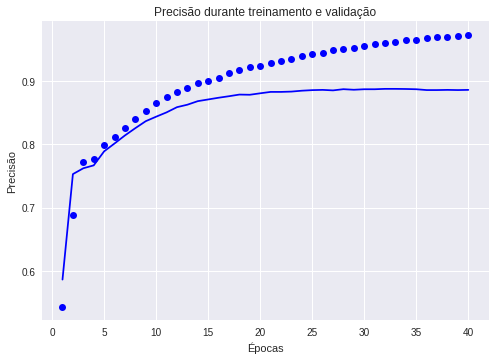

In [30]:
plt.clf()
plt.plot(epochs, precisao, 'bo', label='Precisao durante treinamento')
plt.plot(epochs, precisao_validada, 'b', label='Precisao durante validação')

plt.title('Precisão durante treinamento e validação')
plt.xlabel('Épocas')
plt.ylabel('Precisão')

plt.show()

In [0]:
#@title MIT License
#
# Copyright (c) 2017 François Chollet
#
# Permission is hereby granted, free of charge, to any person obtaining a
# copy of this software and associated documentation files (the "Software"),
# to deal in the Software without restriction, including without limitation
# the rights to use, copy, modify, merge, publish, distribute, sublicense,
# and/or sell copies of the Software, and to permit persons to whom the
# Software is furnished to do so, subject to the following conditions:
#
# The above copyright notice and this permission notice shall be included in
# all copies or substantial portions of the Software.
#
# THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
# IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
# FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL
# THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
# LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING
# FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER
# DEALINGS IN THE SOFTWARE.